
# Disciplina: Ciência e Visualização de Dados na Saúde
## Projeto: Uma abordagem preditiva para potenciais casos de AVC
### Entrega 3: Projeto Final
### Grupo:
1.   Márcia Jacobina Andrade Martins RA: 225269
2.   Regivaldo Sousa Ferreira RA: 225153
3.   Amanda Consulin RA: 234942



## 1 - Introdução

O Projeto **Uma Abordagem Preditiva para Potenciais Casos de Acidente Vascular Cerebral (AVC)** tem o objetivo identificar um modelo de aprendizado de máquina que permita a detecção preventiva do Acidente Vascular Cerebral (AVC). Para isso será efetuada uma análise exploratória da base de dados identificada para o projeto e busca do melhor modelo estatístico para identificar a predisposição do paciente ao AVC,  baseado na análise de determinadas características.

Busca-se identificar padrões nos dados dos pacientes para efetuar uma predição das pessoas que possuem risco de terem AVC durante a sua vida.

Vale lembrar que o AVC causa seis milhões de óbitos por ano, deste total, 50% das pessoas ficam dependentes de outra para atividades do dia a dia e 70% não conseguem retornar mais ao trabalho. 

Suas causas são complexas e suas chances de acometimento podem ser aumentadas quando o indivíduo possui um ou mais fatores de risco relacionados à doença como: alto nível de glicose no sangue, alta taxa de colesterol e triglicérides e doenças cardiovasculares, como hipertensão arterial e arritmias cardíacas, além de hábitos de vida prejudiciais à saúde como sedentarismo, tabagismo e etilismo. 

## 2 - Importação de Pacotes

In [ ]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.7/dist-packages (0.8.0)


In [ ]:
# Importando pacotes
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes  import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
import imblearn

In [ ]:
warnings.filterwarnings('ignore')

## 3 - Leitura dos Dados


### 3.1 - Dicionário de Dados

* id: Identificador único do paciente
* gender: Gênero do paciente (Male/Female/Other)
* age: idade do paciente
* hypertension: Se o paciente é hipertenso ou não (0: não hipertenso, 1: hipertenso)
* heart_disease: Se paciente possui doença do coração ou não (0: não possui, 1: possui)
* ever_married: Se o paciente foi casado uma ou mais vezes ou está casado (0: foi ou é casado, 1: não foi casado)
* work_type: Tipo do trabalho exercido pelo paciente, por esse campo é possível identificar se é uma criança (children/Govt_job/Never_worked/Private)
* Residence_type: Tipo de residência, se rural ou urbana (Rural/Urban)
* avg_glucose_level: taxa média de glicose no sangue
* bmi: índice de massa muscular
* smoking_status: Se o paciente fuma, já foi fumante ou não fuma (formely smoked/never_smoked/smokes/Unknown) 
* stroke: 1 se o paciente teve um AVC e 0 se nunca teve um AVC
OBS: "Unknown" na variável *smoking_status* significa que não se tem essa informação do paciente

In [ ]:
# Usando o método read_csv para leitura do arquivo de zombies
url="https://raw.githubusercontent.com/regivaldo717/C_A_D_S/main/data/processed/Stroke_K_data_base1.csv"
# Copiando os dados para um dataframe
df_stroke=pd.read_csv(url, sep=',')

In [ ]:
df_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# Verificando os tipos das colunas
#df_stroke.columns
df_stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Percebe-se que existem algumas colunas como objeto. Para verificar a correlação, serão transformadas em numéricas.

## 4 - Análise Exploratória dos Dados

In [ ]:
# Verificando as Estatísticas descritivas
df_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Verificando as Estatísticas descritivas das variáveis categóricas
round (df_stroke.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Analisando as estatísticas, percebe-se que existem dados *missing* na columa *bmi* (indicador de massa corporal). A média da idade é em torno de 43 anos, a maioria não é hipertenso (média próxima de 0), a maioria não tem doença do coração (média próxima de 0), a média do nível de glicose fica em torno de 106, o percentual da massa muscular é de 28.8 e poucos pacientes tiveram AVC, pois a média é próxima de 0.

Em relação às variáveis categóricas, a maior parte dos pacientes são do sexo feminino, já foram casados e o tipo de trabalho que exercem é privado. A maior parte deles, também, nunca fumou. Aproximadamente, metade dos pacientes possuem residência urbana.

In [ ]:
# Analisando se existem objetos nulos na base
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### 4.1 Tratamento dos Dados

**Identificação dados missing**

In [ ]:
# Verificando quais colunas possuem dados nulos
df_stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Percebe-se que existem 201 dados nulos na coluna *bmi*. Esses dados serão preenchidos com a média por gênero. 

###4.2 Análise Gráfica Todos Pacientes


In [ ]:
# Análise Exploratória dos Dados
# Visualizando graficamente as variáveis numéricas e categórias do dataframe

# Definindo uma função para plotagem dos gráficos
def plotagem (df_plt1,cond):
    fig, axs = plt.subplots(4, 3, figsize=(15,12))
    fig.tight_layout(pad=2.0)
    # Dados para cada subplot

    # gender
    x=df_plt1['gender'].value_counts()
    sizes=[]
    colors=['skyblue','wheat','r']
    if (cond==1):
        sizes.append(round(x['Male']/df_plt1['gender'].count()*100,2))
        sizes.append(round(x['Female']/df_plt1['gender'].count()*100,2))
        sizes.append(round(x['Other']/df_plt1['gender'].count()*100,2))
        explode=(0,0.1,0)
    else:
        sizes.append(round(x['Male']/df_plt1['gender'].count()*100,2))
        sizes.append(round(x['Female']/df_plt1['gender'].count()*100,2))
        explode=(0,0.1)
    labels=df_plt1['gender'].unique()
    axs[0,0].pie(sizes, labels=labels, autopct='%2.1f%%',
            shadow=True, startangle=90, explode=explode, colors=colors)

    # hypertension
    z=pd.array(['0','1'])
    y=df_plt1['hypertension'].value_counts()
    
    x=y.index
    if (x[0]==0):
       z[0]='False'
       z[1]='True'
    else:
       z[0]='True'
       z[1]='False'
    axs[0,1].bar(z,y, color='cornflowerblue')
    if (cond == 1):
      y1=df_plt1['stroke'].value_counts()
      axs[0,1].bar(z,y1, color='seagreen')
      axs[0,1].legend(labels=['Stroke', 'Not Stroke'])
    
    # age
    axs[0,2].hist(df_plt1['age'],color='mediumpurple',alpha=0.60, bins=10)

    #smoking_status
    y=df_plt1['smoking_status'].value_counts()
    x=y.index
    axs[1,0].barh(x, y, height=0.8, left=None,color='seagreen')

    #ever_married
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
    x=df_plt1['ever_married'].value_counts()
    sizes=[]
    sizes.append(round(x['Yes']/df_plt1['ever_married'].count()*100,2))
    sizes.append(100-round(x['Yes']/df_plt1['ever_married'].count()*100,2))
    axs[1,1].pie(sizes, labels=x.index, autopct='%2.1f%%',
           shadow=True, startangle=90, colors=colors, explode=(0.1,0))

    #avg_glucose_level
    axs[1,2].hist(df_plt1['avg_glucose_level'],color='brown',alpha=0.60)

    #work_type
    y=df_plt1['work_type'].value_counts()
    x=y.index
    axs[2,0].barh(x, y, height=0.8, left=None,color='goldenrod')

    #residence_type  
    y=df_plt1['residence_type'].value_counts()
    x=y.index
    axs[2,1].bar(x, y,color='sandybrown')

    #heart_disease
    x=df_plt1['heart_disease'].value_counts()
    sizes=[]
    colors=['darkseagreen','peachpuff']
    sizes.append(round(x[0]/df_plt1['heart_disease'].count()*100,2))
    sizes.append(100-round(x[0]/df_plt1['heart_disease'].count()*100,2))
    y=x.index
    if (y[0]==0):
       z[0]='False'
       z[1]='True'
    else:
       z[0]='True'
       z[1]='False'
    axs[2,2].pie(sizes, labels=z, autopct='%2.1f%%',
            shadow=True, startangle=90, explode=(0.1,0), colors=colors)

    #bmi
    axs[3,0].hist(df_plt1['bmi'],color='salmon', alpha=0.80)

    #stroke
    colors = ['cadetblue','#ffcc99']
    if (cond==1):
       x=df_plt1['stroke'].value_counts()
       sizes=[]
       sizes.append(round(x[0]/df_plt1['stroke'].count()*100,2))
       sizes.append(100-round(x[0]/df_plt1['stroke'].count()*100,2))
       y=x.index
       if (y[0]==0):
          z[0]='False'
          z[1]='True'
       else:
          z[0]='True'
          z[1]='False'
       axs[3,1].pie(sizes, labels=z, autopct='%2.1f%%',
              shadow=True, startangle=90, explode=(0.1,0), colors=colors)
       axs[3,1].set(title='Percentual AVC')
    else:
       axs[3,1].axis('off')
       axs[3,1].get_xaxis().set_visible(False)
       axs[3,1].get_yaxis().set_visible(False)
    
    axs[3,2].axis('off')
    axs[3,2].get_xaxis().set_visible(False)
    axs[3,2].get_yaxis().set_visible(False)

    axs[0,0].set(title='Percentual por Gênero')
    axs[0,1].set(title='Qtde Hipertensos')
    axs[0,2].set(title='Histograma Idade')
    axs[1,0].set(title='Condição de Fumante')
    axs[1,1].set(title='Percentual Casado (alguma vez)')
    axs[1,2].set(title='Histograma Nível Médio de Glicose')
    axs[2,0].set(title='Tipo de Trabalho')
    axs[2,1].set(title='Tipo de Residência')
    axs[2,2].set(title='Percentual Doença do Coração')
    axs[3,0].set(title='Histograma Índice de Massa Corporal')
    

    plt.show()
    return

In [ ]:
# Copiando o dataframe original 

# Modificando o nome de uma coluna
df_stroke.rename(columns={'Residence_type':'residence_type'}, inplace=True)
df2=df_stroke.copy()

# Apresentando os quantitativos das bases
print ("Quantidade de registros na base: ",df2['id'].count(),"\n")
print (df2['gender'].value_counts(), "\n")
print (df2['hypertension'].value_counts(),"\n")
print (df2['smoking_status'].value_counts(),"\n")
print (df2['work_type'].value_counts(),"\n")
print (df2['ever_married'].value_counts(),"\n")
print (df2['residence_type'].value_counts(),"\n")
print (df2['heart_disease'].value_counts(),"\n")
print (df2['stroke'].value_counts(),"\n")

Quantidade de registros na base:  5110 

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

0    4612
1     498
Name: hypertension, dtype: int64 

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Yes    3353
No     1757
Name: ever_married, dtype: int64 

Urban    2596
Rural    2514
Name: residence_type, dtype: int64 

0    4834
1     276
Name: heart_disease, dtype: int64 

0    4861
1     249
Name: stroke, dtype: int64 



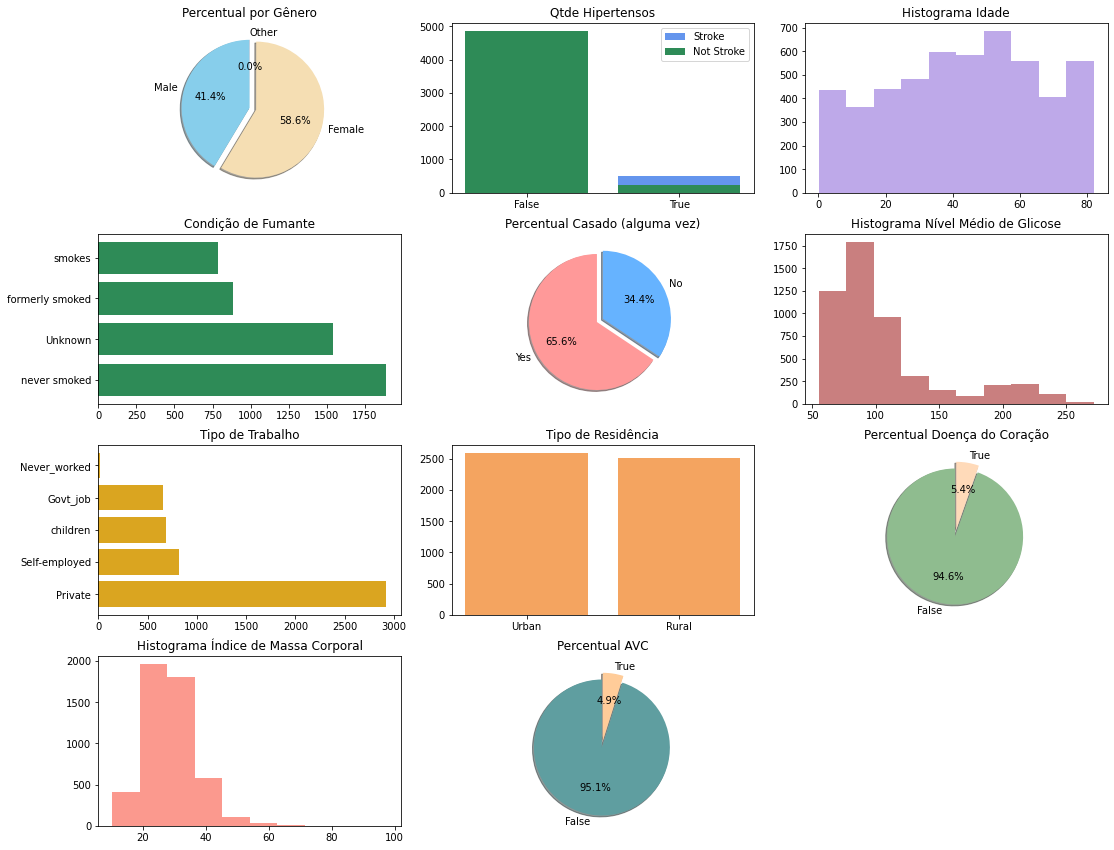

In [ ]:
# Visualizando graficamente o conjunto original dos dados
plotagem(df_stroke,1)

Análise dos gráficos:

* O total da base de dados é de 5110 registros.
* Em relação ao gênero, 41,4% é do gênero masculino e 58,6% é do gênero feminino. Existe um outlier que não tem o gênero identificado e será removido na etapa de tratamento de dados. A partir do bmi, idade e das outras features, tentou-se inferir o gênero, mas não houve um indicativo do sexo, optando-se por removê-lo. 
* Sobre a hipertensão, a maioria dos pacientes não são hipertensos. Existem 498 hipertensos e, desses, 66 são propensos ao AVC. Ou seja, dos 249 pacientes que tiveram AVC, 66 são hipertensos.
* A distribuição das idades não é uma distribuição normal. Percebe-se que a concentração da idade dos pacientes fica na faixa etária entre 40 e 60 anos. 
* Existe uma grande quantidade de pacientes que nunca fumaram (1892), dados desconhecidos (1544) e fumantes e ex-fumantes que totalizam  1674. Os dados desconhecidos não serão preenchidos e como o volume é muito alto, também não poderão ser removidos.
* Em torno de 65% dos pacientes são ou foram casados contra 35% dos pacientes solteiros.
* A maior parte dos pacientes possuem o nível de glicose abaixo de 120.
* Existem 698 pacientes que são crianças (idade até 16 anos). Em relação aos adultos, 2925 trabalham em empregos privados, 819 são autônomos, 657 trabalham para o governo e apenas 22 nunca trabalharam.
* O tipo de residência é bem equilibrado, ficando em torno de 50% rural e 50% urbana.
* Apenas 5,4% possuem doença do coração.
* O índice de massa corporal possui uma distribuição assimétrica à direita ou positiva, sendo que a maior parte dos pacientes possui "bmi" entre 25 e 35.
* E, finalmente, o percentual de pessoas que tiveram AVC mostra-se baixo entre os pacientes, apenas 4,9%. 

Vamos procurar entender os pacientes que tiveram  AVC nesse conjunto de aproximadamente 5% da base.

**Transformação dos Dados**

In [ ]:
# Tratando os dados missing da variável BMI 

# Removendo o dado cujo gênero é igual a "Other", que corresponde a um
# percentual mínimo da base, menor que 0,1%, mas que deve ser removido para uma
# melhor análise

df2.drop(df2[df2['gender'] == 'Other'].index, inplace = True)

# Encontrando a média do BMI por gênero

means = df2.groupby('gender')['bmi'].mean()
df2['bmi'].fillna(0,inplace=True)

# Substituindo os valores missing do bmi pela média levando em conta o gênero

df2.loc[(df2['bmi']==0) & (df2['gender']=='Female'),'bmi'] = means[0]
df2.loc[(df2['bmi']==0) & (df2['gender']=='Male'),'bmi'] = means[1]

# Verificando as mudanças efetuadas
df2.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Analisando as idades por tipo de trabalho
rslt_df = df2[df2['work_type'] == 'children']
rslt_df2 = rslt_df[rslt_df['age'] > 15]

# A idade limite para crianças é de 16 anos, o que comprova que 
# não há necessidade de preenchimento ou substituição de idades 
print (rslt_df2)
print (rslt_df['work_type'].count())

         id  gender   age  ...   bmi  smoking_status stroke
292   44338  Female  16.0  ...  19.5         Unknown      0
461   34376  Female  16.0  ...  19.5         Unknown      0
921   32554  Female  16.0  ...  19.8         Unknown      0
1455  72132    Male  16.0  ...  21.9         Unknown      0
2530  45469    Male  16.0  ...  30.6         Unknown      0
3357  32717    Male  16.0  ...  22.4         Unknown      0
3719  49095  Female  16.0  ...  21.2         Unknown      0
4018  29453    Male  16.0  ...  15.8         Unknown      0
4545  40887    Male  16.0  ...  35.1    never smoked      0
4604  46691    Male  16.0  ...  38.7    never smoked      0
4878  30658    Male  16.0  ...  32.6         Unknown      0

[11 rows x 12 columns]
687


In [ ]:
df2.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Foram substituídos os dados missing de bmi, o dado com gênero igual a *Other* foi removido, os dados da idade das crianças estão coerentes (até 16 anos) e existem 687 crianças na base.

Visualizando as Estatísticas descritivas das variáveis numéricas e categóricas, após as transformações.

In [ ]:
# Estatísticas descritivas das variáveis numéricas
df2.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.892790,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.698351,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Estatísticas descritivas das variáveis categóricas
round (df2.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,residence_type,smoking_status
count,5109,5109,5109,5109,5109
unique,2,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2924,2596,1892


### 4.3 - Análise de Correlação

#### 4.3.1 Cálculo das Correlações

Transformando as variáveis categóricas

In [ ]:
# Transformando variáveis categóricas em numéricas em um novo dataframe
# que será utilizado para o cálculo das correlações

# Transformando dataframe
df3=df2.copy()

df3.loc[df2['gender'] =='Male','gender_num'] = 0
df3.loc[df2['gender'] =='Female','gender_num'] = 1
df3.loc[df2['ever_married'] =='Yes','ever_married_num'] = 1
df3.loc[df2['ever_married'] =='No','ever_married_num'] = 0
df3.loc[df2['smoking_status'] =='never smoked','smoking_status_num'] = 1
df3.loc[df2['smoking_status'] =='Unknown','smoking_status_num'] = 2
df3.loc[df2['smoking_status'] =='formerly smoked','smoking_status_num'] = 3
df3.loc[df2['smoking_status'] =='smokes','smoking_status_num'] = 4
df3.loc[df2['work_type'] =='Private','work_type_num'] = 1
df3.loc[df2['work_type'] =='Self-employed','work_type_num'] = 2
df3.loc[df2['work_type'] =='children','work_type_num'] = 3
df3.loc[df2['work_type'] =='Govt_job','work_type_num'] = 4
df3.loc[df2['work_type'] =='Never_worked','work_type_num'] = 5
df3.loc[df2['residence_type'] =='Urban','residence_type_num'] = 0
df3.loc[df2['residence_type'] =='Rural','residence_type_num'] = 1
df3.drop(columns=["gender","ever_married","work_type","residence_type",
                  "smoking_status","id"], inplace=True)
df3.rename(columns={'gender_num':'gender'}, inplace=True)
df3.rename(columns={'ever_married_num':'ever_married'}, inplace=True)
df3.rename(columns={'work_type_num':'work_type'}, inplace=True)
df3.rename(columns={'residence_type_num':'residence_type'}, inplace=True)
df3.rename(columns={'smoking_status_num':'smoking_status'}, inplace=True)

In [ ]:
# Criando função para o cálculo do pvalue

def calculo_p_value (method, dtf, dtf2):
  for i in dtf.columns[0:]:
    for j in dtf.columns[0:]:
      if (method=='pearson'):
          saida = stats.pearsonr(dtf[i], dtf[j])
      else:
          saida = stats.spearmanr(dtf[i], dtf[j])
      dtf2[i][j] = saida[1]
  return 

In [ ]:
# Cálculo dos valores das correlações
def calculo_valores_corr (COLUNAS, df_orig):
# Cálculo do pvalue da Correlação de Pearson
  df_pearson = pd.DataFrame(index=COLUNAS, columns=COLUNAS)
  calculo_p_value('pearson',df_orig ,df_pearson)
  df_pearson = round(df_pearson.apply(pd.to_numeric),10)
 # Cálculo do pvalue da Correlação de Spearman
  df_spearman = pd.DataFrame(index=COLUNAS, columns=COLUNAS)
  calculo_p_value('spearman',df_orig, df_spearman)
  df_spearman = round(df_spearman.apply(pd.to_numeric),10)
  return (df_pearson, df_spearman)

In [ ]:
def correlacao (df_orig, df_metodo, metodo, tipo, tamfig):
# Plotando a Matriz de Correlação do método escolhido e seu pvalue
 
  f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=tamfig)
  
  ax1.set_title ("Matriz Correlação " + tipo)
  corr = round(df_orig.corr(method=metodo),3)
  mask = np.triu(np.ones_like(corr, dtype=bool))
  ax1 = sns.heatmap(corr, mask=mask,
                    #cmap='RdBu_r',
                    cmap=sns.diverging_palette(220, 10, as_cmap=True),
                    square=True, ax=ax1, annot=True)

  ax2.set_title("PValue Correlação " + tipo)
  df_pearson1=round(df_metodo,3)
  mask2 = np.triu(np.ones_like(df_pearson1, dtype=bool))
  sns.heatmap(df_pearson1,
              mask=mask2,
              cmap="BrBG",
              square=True, ax=ax2, annot=True)
  return

In [ ]:
# Calculando a correlação de Pearson e Spearman
(df_r_pearson, df_r_spearman) = calculo_valores_corr (df3.columns, df3)

####4.3.2- Matriz de Correlação de Pearson 

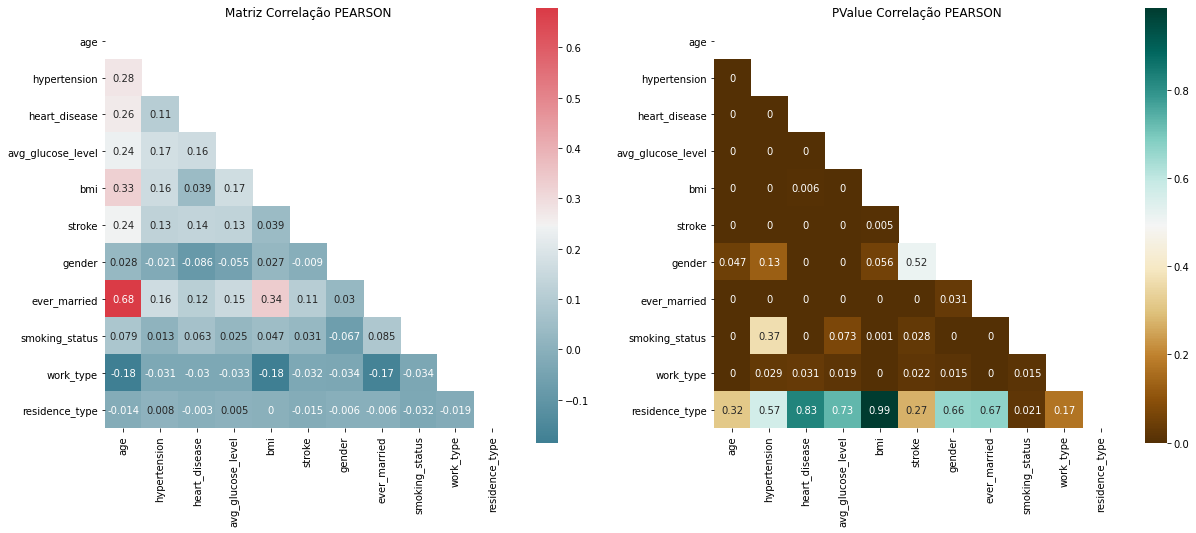

In [ ]:
# Plotando a correlação de Pearson
correlacao (df3, df_r_pearson, 'pearson', 'PEARSON', (20,8))

####4.3.3- Matriz de Correlação de Spearman 

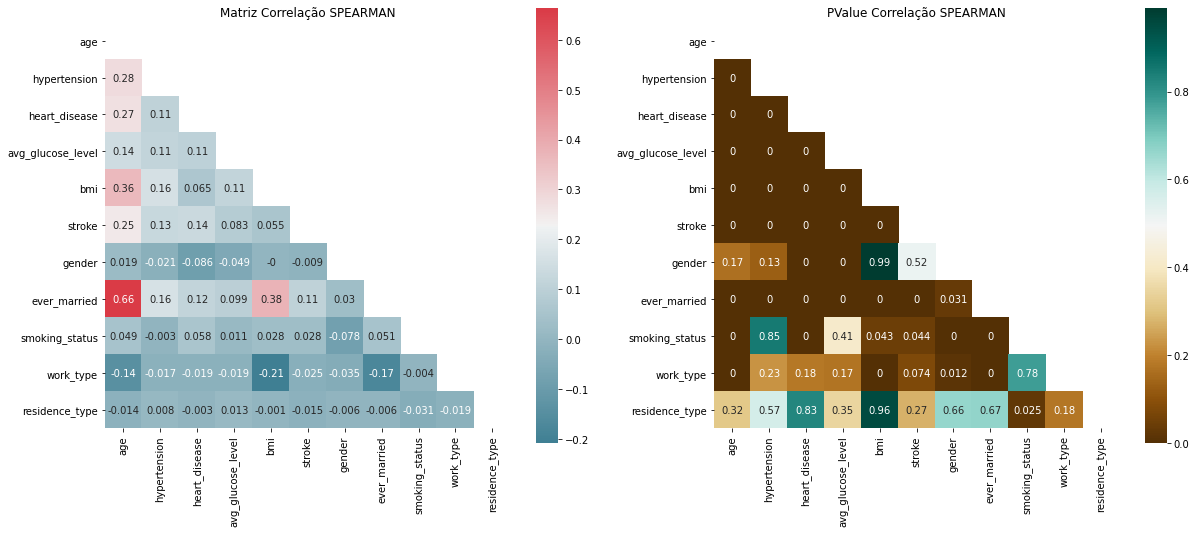

In [ ]:
# Plotando a correlação de Spearman
correlacao(df3, df_r_spearman, 'spearman', 'SPEARMAN', (20,8))

Análise das correlações:
1. Correlações moderadas:
   * *age x ever_married*
2. Correlações fracas:
   * *age x stroke*
   * *age x bmi*
   * *age x heart_disease*
   * *age x hypertension* 
   * *bmi x ever_married*

Percebe-se que **não há uma correlação forte** entre a **variável target *stroke* e outros atributos** numéricos do conjunto de dados.

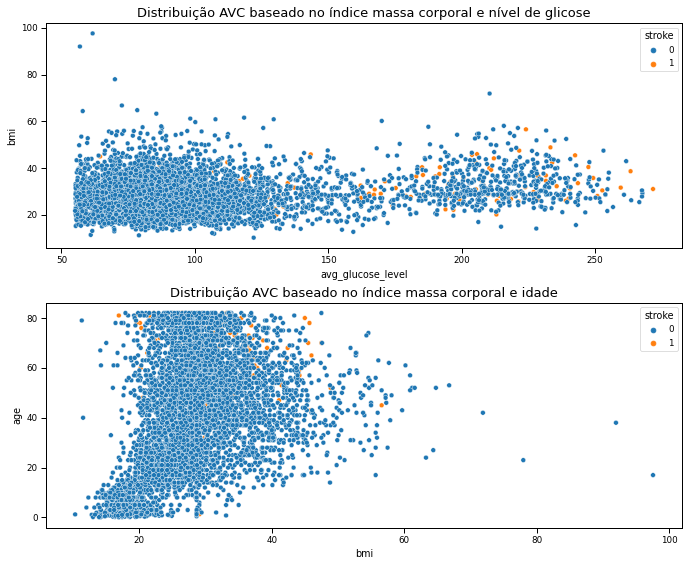

In [ ]:
# Analisando algumas correlações

# Verificando a influência do índice de massa corporal no AVC

plt.rc('figure',figsize=(10,8))
sns.set_context('paper',font_scale=1)
plt.subplot(2,1,1)
plt.title('Distribuição AVC baseado no índice massa corporal e nível de glicose',
          fontdict={'size':13})
sns.scatterplot(x=df3['avg_glucose_level'],y=df3['bmi'],hue=df3['stroke'])

plt.subplot(2,1,2)
plt.tight_layout(pad=2.0)
plt.title('Distribuição AVC baseado no índice massa corporal e idade',
          fontdict={'size':13})
sns.scatterplot(x=df3['bmi'],y=df3['age'],hue=df3['stroke'])
plt.show()

Percebe-se que para as pessoas com predisposição ao AVC, o nível médio de glicose no sangue é superior a 150, tendo uma tendência, nesses casos, para uma massa corporal mais elevada. Embora não seja um indicativo tão forte.

Analisando a massa corporal com a idade, verifica-se que existe uma variação, porém há uma tendência a uma massa corporal mais elevada. Além disso, o que pode ser destacado é que a faixa etária dos propensos ao AVC é acima de 40 anos.

### 4.4 Análise Gráfica Pacientes com Predisposição ao AVC

In [ ]:
def analise_paciente_avc (): 
  # Distribuição por Idade/AVC

  fig2 = plt.figure(figsize = (20,10), dpi = 40)
  gs = fig2.add_gridspec(10,20)
  gs.update(wspace = 1, hspace = 0.05)
  
  ax1 = fig2.add_subplot(gs[1:10, 0:10]) #hue distribution plot
  ax2 = fig2.add_subplot(gs[1:10,13:]) #dumbbell plot

  # axes list
  axes = [ ax1, ax2]

  # histograma
  sns.kdeplot(data = df3[df3['stroke'] == 0], x = 'age', ax = ax1, shade = True,  alpha = 1, color = 'seagreen',legend=True )
  sns.kdeplot(data = df3[df3['stroke'] == 1], x = 'age', ax = ax1, shade = True,  alpha = 0.8, color = 'brown', legend=True)

  
  ax1.set_xlabel('age',{'size':16})
  ax2.set_xlabel('stroke',{'size':16})

  ax1.text(10,0.0425,'Distribuição por Idade/AVC',{'size':18})
  ax1.text(10,0.0369, 'Saudável ', {'weight':'bold','size':'14', 'color':'seagreen'})
  ax1.text(28,0.0369, '|', {'color':'black' , 'size':'14', 'weight': 'bold'})
  ax1.text(32,0.0369, 'AVC',{'size': '14','style':'normal', 'weight':'bold','color':'brown'})

  ax2.text(0.2,90,'Boxplot Idade',{'size':18})
  
  #Boxplot
  ax2 = sns.boxplot(x="stroke", y="age", data=df3)
    
  #sns.set_context("paper", font_scale=1.6)
  #sns.set_style(style=None)
  fig2.show()
  return

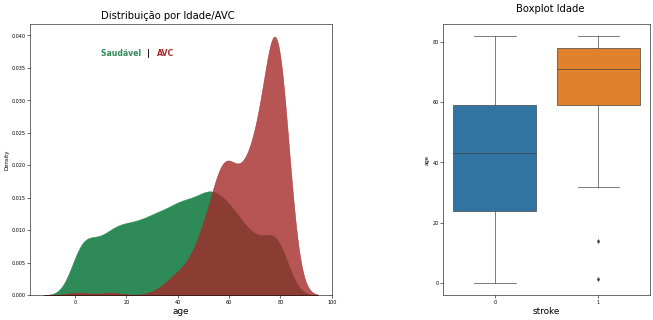

In [ ]:
analise_paciente_avc()

Explorando um pouco mais a análise de quem tem predisposição ao AVC, é possível interpretar os gráficos acima da seguinte forma:
1. Na distribuição da Idade/AVC, percebe-se que a maior parte dos pacientes com predisposição ao AVC tem uma idade superior a 40 anos, mais fortemente entre 60 e 80 anos.
2. Em relação ao boxplot, o mesmo é evidenciado. Existem alguns outliers, mais a maior parte dos propensos ao AVC está na faixa etária entre 60 e 80 anos, com uma média de idade na faixa dos 75 anos.

Isso nos faz concluir que pessoas de mais idade tem maior probabilidade de ter AVC de que pessoas mais jovens. Embora, a princípio, seja uma conclusão óbvia, os gráficos nos mostram de uma forma visual essa verdade.

Abaixo será analisado o conjunto dos dados dos pacientes que tiveram AVC, de modo similar ao feito para todo o conjunto de dados.

In [ ]:
# Criando um dataframe apenas com pacientes predispostos ao AVC
df4=df2.loc[(df2['stroke'] == 1)]

# Apresentando os quantitativos dessa base
print ("Quantidade de registros na base pacientes que tiveram AVC: ",df4['id'].count(),"\n")
print (df4['gender'].value_counts(), "\n")
print (df4['hypertension'].value_counts(),"\n")
print (df4['smoking_status'].value_counts(),"\n")
print (df4['work_type'].value_counts(),"\n")
print (df4['residence_type'].value_counts(),"\n")
print (df4['heart_disease'].value_counts(),"\n")
print (df4['stroke'].value_counts(),"\n")

Quantidade de registros na base pacientes que tiveram AVC:  249 

Female    141
Male      108
Name: gender, dtype: int64 

0    183
1     66
Name: hypertension, dtype: int64 

never smoked       90
formerly smoked    70
Unknown            47
smokes             42
Name: smoking_status, dtype: int64 

Private          149
Self-employed     65
Govt_job          33
children           2
Name: work_type, dtype: int64 

Urban    135
Rural    114
Name: residence_type, dtype: int64 

0    202
1     47
Name: heart_disease, dtype: int64 

1    249
Name: stroke, dtype: int64 



In [ ]:
df5=df4.loc[(df4['avg_glucose_level'] >=160)&(df4['avg_glucose_level']<=250)]
df5

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
235,1210,Female,68.0,0,0,Yes,Private,Rural,211.06,39.300000,Unknown,1
237,36857,Male,77.0,0,0,Yes,Self-employed,Rural,162.14,32.600000,formerly smoked,1
241,52282,Male,57.0,0,0,Yes,Private,Rural,197.28,34.500000,formerly smoked,1
242,45535,Male,68.0,0,0,Yes,Private,Rural,233.94,42.400000,never smoked,1


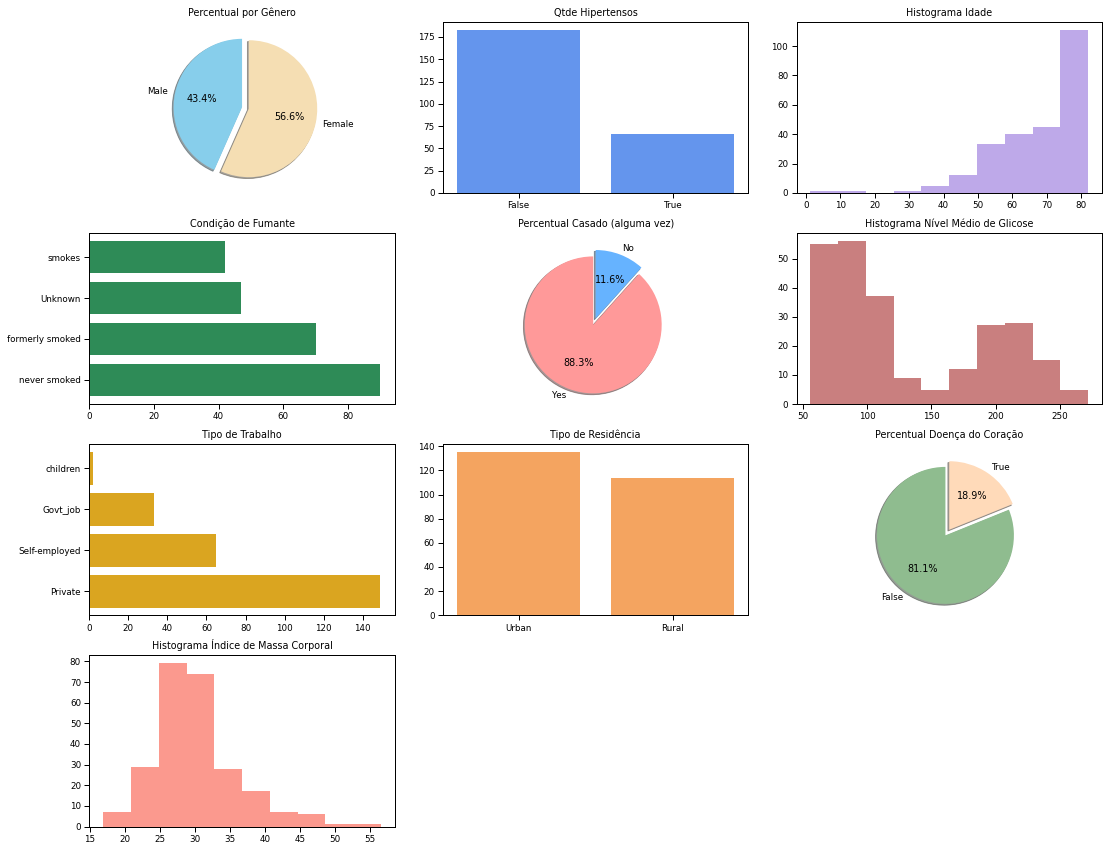

In [ ]:
# Visualizando graficamente os dados dos pacientes com predisposição ao AVC
plotagem(df4, 0)

Análise dos gráficos pacientes que tiveram AVC:

* O total da base de dados é de 249 registros, ou seja, 249 pacientes predisposto ao AVC no conjunto de 5110 pacientes.
* Em relação ao gênero, 43,4% é do gênero masculino e 56,6% é do gênero feminino. Ou seja, percebe-se que não há uma correlação forte do gênero em relação à predisposição ao AVC e o percentual dos gêneros se aproxima ao da base original.
* Sobre a hipertensão, a maioria dos pacientes não são hipertensos. Existem apenas 66 hipertensos, que corresponde a 26,5% do total propensos ao AVC.
* A distribuição das idades não é uma distribuição normal. Percebe-se que a faixa etária dos pacientes propensos ao AVC está acima de 40 anos, com uma concentração entre 60 e 80 anos. O mesmo resultado encontrado nos gráficos analisados anteriormente.
* 90 pacientes nunca fumaram e 70 são ex-fumantes. Apenas 42 fumam e 47 não tem essa informação.
* Em torno de 88% dos pacientes são ou foram casados contra 11% dos pacientes solteiros. Ou seja, a maior parte dos pacientes com predisposição ao AVC eram casados.
* A maior parte dos pacientes possuem o nível de glicose abaixo de 120, embora tenham que tiveram AVC com um nível de glicose mais elevado, na entre 160 e 220, em torno de 84 pacientes.
* Foi identificado apenas 2 pacientes crianças que tiveram AVC. Em relação aos adultos, a maior parte trabalha em empregos privados, 149 pacientes, 65 são autônomos e 33 trabalham no governo.
* O tipo de residência é bem equilibrado, ficando em torno de 50% rural e 50% urbana.
* 18% possuem doença do coração, esse percentual é bem superior ao observado na base original.
* O índice de massa corporal possui uma distribuição assimétrica à direita ou positiva, sendo que a maior parte dos pacientes possui "bmi" entre 25 e 35. É a mesma tendência encontrada na base completa.

**Gravação da base de dados transformada**


In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#df3.to_csv('Stroke_K_data_base1_tf.csv')
#!cp Stroke_K_data_base1_tf.csv "/content/gdrive/My Drive/Dados"

### 4.5 - Conclusão Análise Exploratória dos Dados

A análise exploratória da base de dados do AVC foi realizada no google colab, utilizando o python e o jupyter notebook. Teve as seguintes etapas:
* remoção de outliers
* substituição de dados "missing" do bmi pela média dos gêneros encontrada
* análise da correlação de Pearson e Spearman
* recursos visuais para apresentação dos dados e aprofundamento sobre os mesmos
* slice da base para um melhor entendimento sobre os pacientes que tiveram AVC

Conclui-se que a **idade** (*age*) é o fator preponderante para a predisposição ao AVC. Entretanto, pela análise de correlação, as correlações encontradas foram fracas em relação a ter ou não AVC. 

Outros gráficos, entretanto, mostraram que o **índice de massa corporal** (*bmi*) muito elevado foi detectado em pessoas que tiveram o AVC, assim como foi encontrado um **nível médio de glicose no sangue** (*avg_glucose_level*) elevado. A **hipertensão** (*hypertension*) não é um fator prepoderante, porém o percentual aumenta nos pacientes que tiveram AVC em relação à análise da base original. Apenas 6% dos que não tiveram AVC são hipertensos, enqanto que 26,5% dos que tiveram AVC são hipertensos. Também não foi percebido relação com o fato de ser fumante ou não para a predisposição ao AVC.


## 5 - Avaliação Modelos Estatísticos

###5.1 - Estratégia
Os modelos identificados para a previsão do AVC são de **aprendizado de máquina supervisionado**, já que estamos tentando prever uma variável dependente (target), a partir de uma lista de variáveis independentes.
A variável target é a que irá identificar a propensão dos pacientes ao AVC, *stroke* ou *not stroke*.

Desse modo, serão avaliados 5 modelos de aprendizado de máquina supervisionado:

*   Regressão Logística
*   Support Vector Machine (SVM)
*   Random Forest
*   K Neighbors
*   Naive Bayes
 
As variáveis features adotadas tendo por base a análise de correlação entre elas e da correlação com a variável target "stroke" são:

*   *age* 
*   *bmi*
*   *hypertension* 
*   *avg_glucose_level*

As variáveis *bmi*, *hypertension* tem correlação fraca com *age* e existe a possibilidade de ocorrer **overfitting**.  Sobre a glicose no sangue, percebe-se um valor mais elevado nas pessoas com predisposição ao AVC e será, também, utilizada como feature. A hipertensão, também, foi identificada como relacionada com o AVC, a partir da análise gráfica. Entretanto, será realizado um teste progressivo com as features indicadas para verificar a necessidade de mantê-las ou não.

Serão aplicadas 3 técnicas diferentes sobre os dados, o **train_test_split**, o **Stratified kfold** e o **oversampling**, com o intuito de aumentar a amostra para análise, em conjunto dom a busca dos melhores hiperparâmetros. Será, também, efetuada uma comparação entre os modelos baseada no resultado de diversas métricas de avaliação e será escolhido o que tiver a melhor performance com base na análise da matriz de confusão, das métricas de avaliação e das curvas ROC e Precision Recall.

**Matriz de Confusão**

| |      Positive                   | Negative       
|:-----| :------------------------------ | :------------- 
|**Positive** | TRUE POSITIVE | FALSE NEGATIVE
|**Negative** | FALSE POSITIVE| TRUE NEGATIVE

>
*   **True Positive**: classificação correta da classe Positivo
*   **False Negative** (Erro Tipo II): erro em que o modelo previu a classe Negativo quando o valor real era classe Positivo
*  **False Positive** (Erro Tipo I): erro em que o modelo previu a classe Positivo quando o valor real era classe Negativo
*  **True Negative**: classificação correta da classe Negativo

**Métricas de Avaliação**

*  **Accuracy**: indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente. (TP=TN)/(TP+TN+FP+FN)
*  **Precision**: dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas. TP/(TP+FP)
*  **Recall**: dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas. TP/(TP+FN)
*  **F1-Score**: média harmônica entre precisão e recall. 2* (Precision * Recall)/(Precision + Recall)

**Curva ROC**

A Curva ROC permite evidenciar os valores para os quais existe maior otimização da sensibilidade em função da especificidade que corresponde ao ponto em que se encontra mais próxima do canto superior esquerdo do diagrama, uma vez que o o índice de positivos verdadeiro é 1 e o de falsos positivos é zero. Quanto mais perto a curva chega da diagonal de 45 graus do espaço ROC, menos preciso é o teste.

A sensibilidade é o percentual das predições positivas corretas em relação a todas as positivas reais. Enquanto que especificidade é o percentual das predições negativas corretas em relação a todas as negativas reais.

**Curva Precision-Recall**

A curva Precision-Recall mostra o equilíbrio (*trade-off*) entre *Precisão* e *Recall*(sensibilidade). A Precisão representa a taxa de verdadeiros positivos (TP/(TP+FP)) e o Recall o valor preditivo positivo (TP/(TP+FN)) para um classificador usando diferentes limites de probabilidade. É indicada para bases de dados desbalanceadas. Quanto mais perto a curva está do canto superior esquerdo, melhor é a relação entre precisão e recall.

Identificação das variáveis (features e target) e análise dos pacientes

In [ ]:
# Identificando as variáveis features e a variável target
#X = df3[['age','bmi','avg_glucose_level','hypertension','gender','heart_disease','work_type']]
X = df3[['age', 'bmi', 'avg_glucose_level', 'hypertension']]
y = df3['stroke']

# O número de pacientes propensos ao AVC na base original totaliza 249, o que identifica essa classe como
# minoritária, já que o total de pessoas que não tiveram o AVC é de 4860
print ("Quantidade de pacientes propensos ao AVC = ", y.sum())
print ("Quantidade de pacientes NÃO propensos ao AVC = ", y.count()-y.sum())

Quantidade de pacientes propensos ao AVC =  249
Quantidade de pacientes NÃO propensos ao AVC =  4860


In [ ]:
# Criando o dataframe para comparar as métricas dos modelos
df_metricas_class0 = pd.DataFrame (index=['LogisticRegression','SVC','RandomForest','KNeighbors','GaussianNB'], 
                                  columns=['f1','precision','recall','roc_auc','ap','accuracy'])
df_metricas_class1 = pd.DataFrame (index=['LogisticRegression','SVC','RandomForest','KNeighbors', 'GaussianNB'], 
                                  columns=['f1','precision','recall', 'roc_auc','ap'])
# Criando o dicionário para comparar a matriz de confusão dos modelos
cf_matrix={}

**Definição Funções**

In [ ]:
# Função para computar as métricas de performance dos modelos das classes dos 
# pacientes NÃO propensos ao AVC e propensos ao AVC

def computa_metricas (nome_modelo, y_test, y_pred, roc_auc, roc_auc2, ap, ap2):
  df_metricas_class0.loc[nome_modelo,'f1'] = round(metrics.f1_score(y_test, y_pred, pos_label=0),2)
  df_metricas_class0.loc[nome_modelo,'recall'] = round(metrics.recall_score(y_test, y_pred, pos_label=0),2)
  df_metricas_class0.loc[nome_modelo,'precision'] = round(metrics.precision_score(y_test, y_pred, pos_label=0),2)
  df_metricas_class0.loc[nome_modelo,'roc_auc'] = round(roc_auc,2)
  df_metricas_class0.loc[nome_modelo,'ap'] = round(ap,2)
  df_metricas_class0.loc[nome_modelo,'accuracy'] = round(metrics.accuracy_score(y_test, y_pred),2)
  df_metricas_class1.loc[nome_modelo,'f1'] = round(metrics.f1_score(y_test, y_pred, pos_label=1),2)
  df_metricas_class1.loc[nome_modelo,'recall'] = round(metrics.recall_score(y_test, y_pred, pos_label=1),2)
  df_metricas_class1.loc[nome_modelo,'precision'] = round(metrics.precision_score(y_test, y_pred, pos_label=1),2)
  df_metricas_class1.loc[nome_modelo,'roc_auc'] = round(roc_auc,2)
  df_metricas_class1.loc[nome_modelo,'ap'] = round(ap2,2)
  return


In [ ]:
# Função para plotar as métricas de performance dos modelos das classes dos 
# pacientes NÃO propensos ao AVC e propensos ao AVC

def plotagem_metricas (df_class0, df_class1, titulo0, titulo1):
  fig, axs = plt.subplots(2, 1, figsize=(10,7))
  colors = plt.cm.BuPu(np.linspace(0.1, 0.5, len(df_class0.index)))
  colors = colors[::-1]
  axs[0].axis('off')
  axs[0].get_xaxis().set_visible(False)
  axs[0].get_yaxis().set_visible(False)
  axs[1].axis('off')
  axs[1].get_xaxis().set_visible(False)
  axs[1].get_yaxis().set_visible(False)

  the_table0 = axs[0].table(cellText=df_class0.values,
                        rowLabels=df_class0.index,
                        rowColours=colors,
                        colLabels=df_class0.columns,
                        cellLoc='center',
                        loc='upper left')
  the_table1 = axs[1].table(cellText=df_class1.values,
                        rowLabels=df_class1.index,
                        rowColours=colors,
                        colLabels=df_class1.columns,
                        cellLoc='center',
                        loc='upper left')
  the_table0.scale(1, 2)
  the_table1.scale(1, 2)
  axs[0].set_title (titulo0, fontsize=12)
  axs[1].set_title (titulo1, fontsize=12)
  return

In [ ]:
# Função para plotar a matriz de confusão e parâmetros de performance

def plotagem_matriz_confusao (nome_modelo, modelo, X_test, y_test, folds, compara):
  if (folds==0):
     y_pred=modelo.predict(X_test)
     cmap='YlGnBu'
  else:
     y_pred = cross_val_predict(modelo, X_test, y_test, cv = folds)
     cmap='PuBuGn'
  print(metrics.classification_report(y_test, y_pred))
  print('Accuracy Score: ',metrics.accuracy_score(y_test, y_pred),"\n\n")
  if (compara == True):
     cmap='GnBu'
  fig, ax = plt.subplots(figsize=(5,4))
  sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, 
             ax=ax, fmt='d', cmap=cmap)
  ax.set_title("Matriz de Confusão - " + nome_modelo, fontsize=12)
  ax.set_ylabel("True label")
  ax.set_xlabel("Predicted Label")
  fig.tight_layout(pad=1)
  if (compara==True):
     cf_matrix[nome_modelo] = metrics.confusion_matrix(y_test, y_pred)
  return (y_pred)

In [ ]:
def plotagem_curvas (nome_modelo, modelo, X_test, y_test, folds, pos_label):
  roc_auc = 0
  ap=0
  if (pos_label == 0):
     classe='Not Stroke'
  else:
     classe='Stroke'
  fig, axs = plt.subplots(1, 2, figsize=(12,4))
  axs[0].set_title("Curva ROC - " + nome_modelo + " \"" + classe + "\"" , fontsize=10)
  disp = metrics.plot_roc_curve(modelo, X_test, y_test, ax=axs[0], pos_label=pos_label)
  roc_auc = disp.roc_auc
  axs[1].set_title("Curva Precision Recall - " + nome_modelo + " \"" + classe + "\"", fontsize=10)
  disp = metrics.plot_precision_recall_curve(modelo, X_test, y_test, ax=axs[1], pos_label=pos_label)
  ap = disp.average_precision
  return (roc_auc, ap)

In [ ]:
# Funcao para plotar "lado a lado" as matrizes de confusão de todos os modelos de aprendizado
# de máquina analisados para efeito comparativo

def plotagem_matrizes (cf_matrix):
  fig, axs = plt.subplots(2,3, figsize=(14,6))
  for i, ax in enumerate(axs.flat):
      if (i>4):
        axs[1,2].axis('off')
        axs[1,2].get_xaxis().set_visible(False)
        axs[1,2].get_yaxis().set_visible(False)
        break
      k = list(cf_matrix)[i]
      sns.heatmap(cf_matrix[k], annot=True, ax=ax, fmt='d', cbar=i==5, cmap='GnBu')
      ax.set_title(k,fontsize=10) 
  return

### 5.2 - Técnica Avaliação: **subdivisão dados treino e teste**


O **train-test split** é uma técnica para avaliar a performance de um algoritmo de aprendizado de máquina. Pode ser usado para problemas de classificação ou regressão e para qualquer algoritmo de aprendizado supervisionado. Divide um conjunto de dados em dois subconjuntos, um de treino e um de teste.



In [ ]:
# Subdivisão em dados de treino (75%) e teste (25%)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

#### 5.2.1 - Regressão Logística

In [ ]:
# Regressão Linear Logística usando o pacote linear_regression do sklearn
lreg= LogisticRegression(solver='liblinear',multi_class='ovr')
lreg.fit(X_train,y_train)
print ("Acurácia = ", lreg.score (X_test, y_test))

Acurácia =  0.9374021909233177


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278

Accuracy Score:  0.9374021909233177 




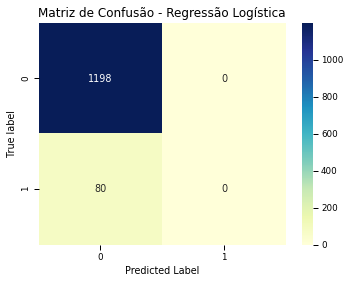

In [ ]:
# Visualização da matriz de confusão e métricas do modelo
y_pred = plotagem_matriz_confusao ("Regressão Logística", lreg, X_test, y_test, 
                                   0, compara=False)

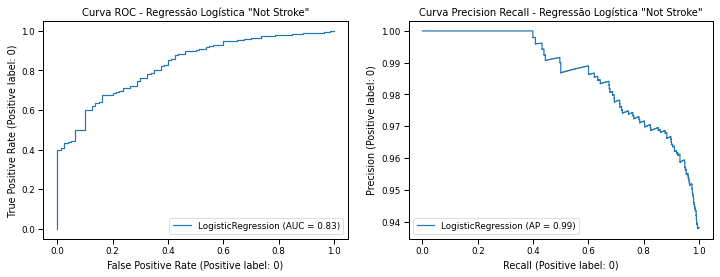

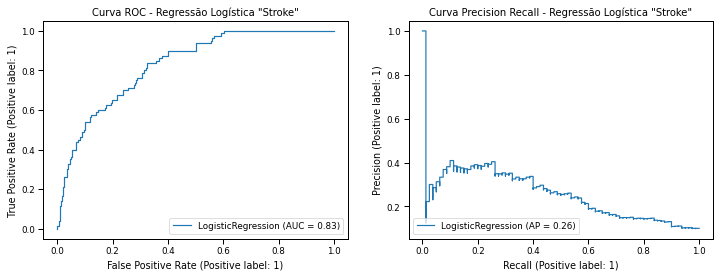

In [ ]:
# Visualização das Curvas ROC e Precision Recall para ambas as classes
roc_auc, ap = plotagem_curvas ("Regressão Logística", lreg, X_test, y_test, 0, 0)
roc_auc2, ap2 = plotagem_curvas ("Regressão Logística", lreg, X_test, y_test, 0, 1)

####5.2.2 - SVM

In [ ]:
# Support Vector Machine usando o pacote SVC do sklearn

svm = SVC()
svm.fit(X_train, y_train)
print ("Acurácia = ", svm.score(X_test, y_test))

Acurácia =  0.9374021909233177


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278

Accuracy Score:  0.9374021909233177 




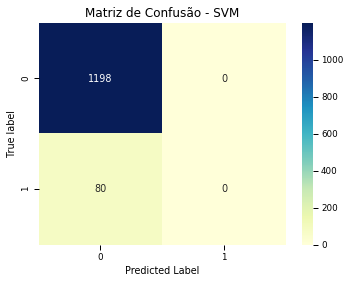

In [ ]:
# Visualização da matriz de confusão e métricas do modelo
y_pred = plotagem_matriz_confusao ("SVM", svm, X_test, y_test, 
                                   0, compara=False)

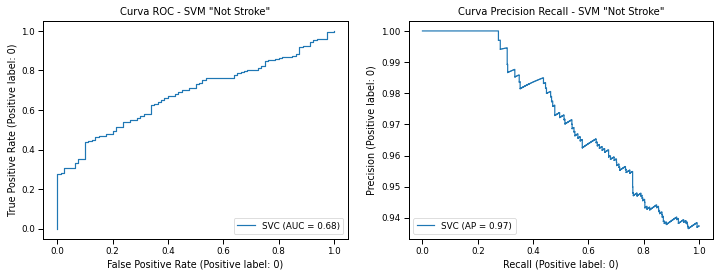

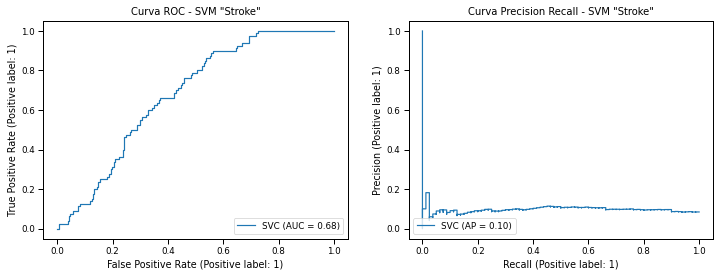

In [ ]:
# Visualização das Curvas ROC e Precision Recall para ambas as classes
roc_auc, ap = plotagem_curvas ("SVM", svm, X_test, y_test, 0, 0)
roc_auc2, ap2 = plotagem_curvas ("SVM", svm, X_test, y_test, 0, 1)

####5.2.3 - Random Forest

In [ ]:
# Random Forest usando o pacote RandomForestClassifier do sklearn

rf = RandomForestClassifier(n_estimators=40)
rf.fit (X_train, y_train)
print ("Acurácia = ", rf.score (X_test, y_test))

Acurácia =  0.9327073552425665


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1198
           1       0.20      0.03      0.04        80

    accuracy                           0.93      1278
   macro avg       0.57      0.51      0.50      1278
weighted avg       0.89      0.93      0.91      1278

Accuracy Score:  0.9327073552425665 




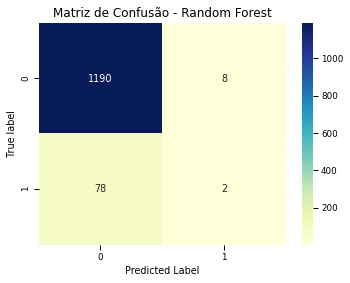

In [ ]:
# Visualização da matriz de confusão e métricas do modelo
y_pred = plotagem_matriz_confusao ("Random Forest", rf, X_test, y_test, 
                                   0, compara=False)

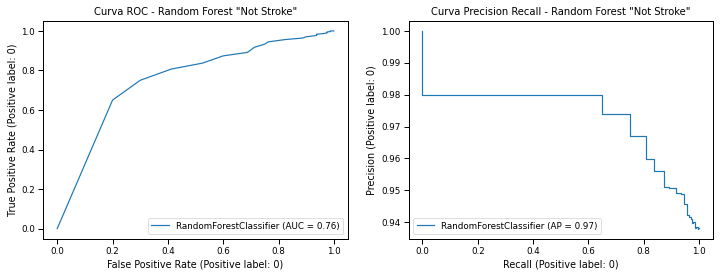

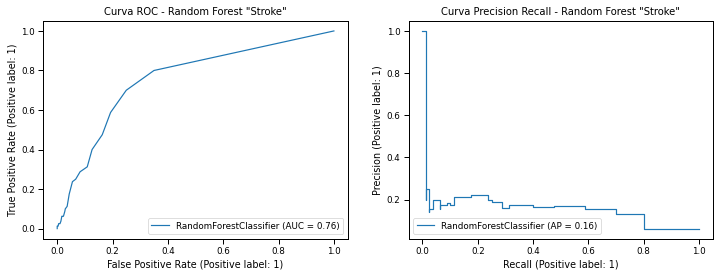

In [ ]:
# Visualização das Curvas ROC e Precision Recall para ambas as classes
roc_auc, ap = plotagem_curvas ("Random Forest", rf, X_test, y_test, 0, 0)
roc_auc2, ap2 = plotagem_curvas ("Random Forest", rf, X_test, y_test, 0, 1)

####5.2.4 - K Neighbors

In [ ]:
# K Neighbors usando o pacote KneighborsClassifier do sklearn
kn = KNeighborsClassifier(n_neighbors=20, n_jobs=-1)
kn.fit (X_train, y_train)
print ("Acurácia = ", kn.score (X_test, y_test))

Acurácia =  0.9374021909233177


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278

Accuracy Score:  0.9374021909233177 




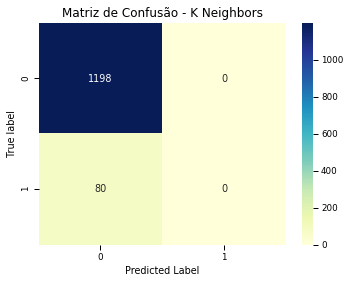

In [ ]:
# Visualização da matriz de confusão e métricas do modelo
y_pred = plotagem_matriz_confusao ("K Neighbors", kn, X_test, y_test, 
                                   0, compara=False) 

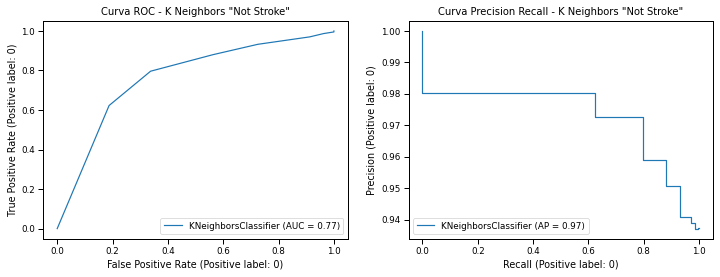

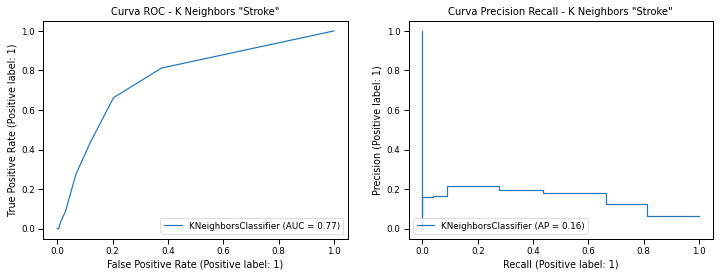

In [ ]:
# Visualização das Curvas ROC e Precision Recall para ambas as classes
roc_auc, ap = plotagem_curvas ("K Neighbors", kn, X_test, y_test, 0, 0)
roc_auc2, ap2 = plotagem_curvas ("K Neighbors", kn, X_test, y_test, 0, 1)

####5.2.5 - Naive Bayes

In [ ]:
# Naive Bayes usando o pacote GaussianNBClassifier do sklearn
nb = GaussianNB ()
nb.fit (X_train, y_train)
print ("Acurácia = ", nb.score (X_test, y_test))

Acurácia =  0.8865414710485133


              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1198
           1       0.24      0.36      0.29        80

    accuracy                           0.89      1278
   macro avg       0.60      0.64      0.61      1278
weighted avg       0.91      0.89      0.90      1278

Accuracy Score:  0.8865414710485133 




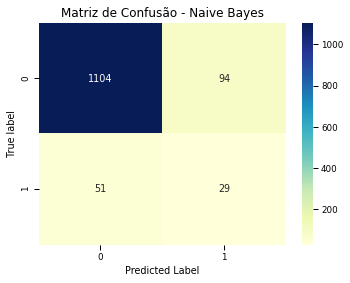

In [ ]:
# Visualização da matriz de confusão e métricas do modelo
y_pred = plotagem_matriz_confusao ("Naive Bayes", nb, X_test, y_test, 
                                   0, compara=False)

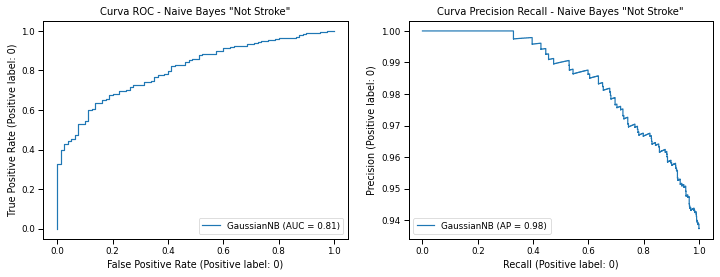

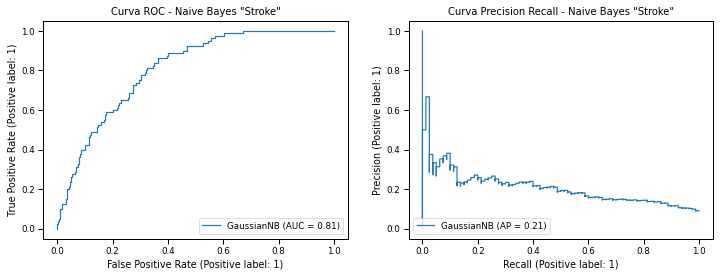

In [ ]:
# Visualização das Curvas ROC e Precision Recall para ambas as classes
roc_auc, ap = plotagem_curvas ("Naive Bayes", nb, X_test, y_test, 0, 0)
roc_auc2, ap2 = plotagem_curvas ("Naive Bayes", nb, X_test, y_test, 0, 1)

####5.2.6 - Comparação entre os Modelos

Inicialmente, foram separados os dados de teste e treino usando a função **train_test_split**, com 25% dos dados para teste e 75% para treino e esses dados foram utilizados em todos os algoritmos de ML identificados.

Após algumas rodadas de teste gradativo com as features para verificar a ocorrência de **overfitting**, confirmou-se que as melhores features são as sinalizadas na conclusão da análise exploratória dos dados: *age*, *bmi*, *avg_glucose_level* e *hypertension*. Entretanto como o resultado geral foi de uma acurácia de 93%, com exceção do Naive Bayes com 88%, existe a possibilidade de overfitting nos modelos encontrados.

Além disso, deve-ser ficar atento ao objetivo que se deseja alcançar. A acurácia nos mostra quantos acertos os modelos tiveram, mas quantos desses acertos foram de pessoas com propensão ao AVC? Consideramos que **identificar pessoas predispostas ao AVC é mais importante do que ter uma acurácia elevada naquelas não propensas ao AVC.**

Desse modo, novas métricas devem ser avaliadas, como a sensibilidade e especificidade. Observe na matriz de confusão que os verdadeiros negativos (True Negative) que identificam as pessoas predispostas ao AVC está zero ou insigificante em todos os algoritmos. Ou seja, os algoritmos erraram na previsão dos casos de AVC, gerando um especificidade de 0 ou quase 0, embora a sensibilidade tenha sido 1 (preveram corretamente a quantidade de pacientes não propensos ao AVC). Isso significa que os algoritmos não aprenderam corretamente e previram que todos os pacientes não são propensos ao AVC. 

Além disso, a curva ROC de todos os modelos evidencia o resultado encontrado entre a especificidade e sensibilidade, o equilíbrio entre a sensibilidade e especificidade pode ser melhorado (AUC entre 0,68 e 0,84) e buscado uma curva mais próxima do canto superior esquerdo. Embora tenha sido apresentado a curva ROC para ambas as classes consideradas como positivas no momento, o AUC será sempre similar, já que a curva trabalha com a sensibilidade e especificidade e essas métricas envolvem sempre as duas classes. 

Sobre a curva Precision-Recall, os valores da precisão média (AP) que significa a média ponderada das precisões alcançadas em cada limite, usando como peso o aumento do recall do limite anterior, foram elevados para a classe "Not Stroke" com um AP em torno de 0,97. Porém, verificando essa curva para a classe "Stroke" o AP fica bem baixo, entre 0,10 e 0,26. É um valor abaixo de 0,5. o que evidencia que o equilíbrio entre precisão e recall não é bom e que os dados estão desbalanceados. Quanto mais perto de 1, mais perfeito será o modelo.

Isso nos mostra que devemos continuar evoluindo com as técnicas de avaliação dos algoritmos.

### 5.3 - Técnica Avaliação: **validação cruzada com *folds* estratificados**

A validação cruzada  - **cross validation** - é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados. Esta técnica é amplamente empregada em problemas onde o objetivo da modelagem é a predição. Permite a subdivisão dos dados em vários folds separando os dados em dados de teste e de treino.

O **StratifiedKFold cross validation** é uma extensão da validação cruzada KFold e especificamente utilizada para problemas de classificação.  Separa o conjunto de dados em dados de treino e de teste, subdividindo em *folds* estratificados. Ou seja, os *folds* são definidos preservando a proporção de amostras de cada classe.

In [ ]:
# Gerando os folds com o Stratified KFold cross validator

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

####5.3.1 Regressão Logística

In [ ]:
# Avaliação do modelo de Regressão logística usando o cross_val_score
lreg = LogisticRegression(solver='liblinear', multi_class='ovr')
cross_val_score(lreg, X, y,cv=folds)

array([0.95107632, 0.95107632, 0.95107632, 0.95107632, 0.95200784])

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278

Accuracy Score:  0.9374021909233177 




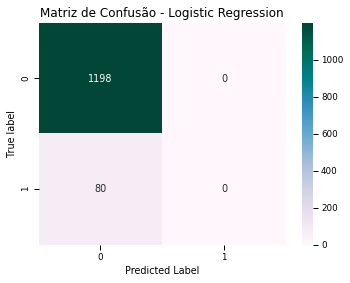

In [ ]:
# Visualização da matriz de confusão e métricas do modelo
y_pred = plotagem_matriz_confusao ("Logistic Regression", lreg, X_test, y_test, 
                                   folds, compara=False)

####5.3.2 Support Vector Machine (SVM)

In [ ]:
# Avaliação do modelo SVM usando o cross_val_score
svm = SVC(gamma='auto')
cross_val_score(svm, X, y,cv=folds)

array([0.95009785, 0.95009785, 0.95107632, 0.95107632, 0.95200784])

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278

Accuracy Score:  0.9366197183098591 




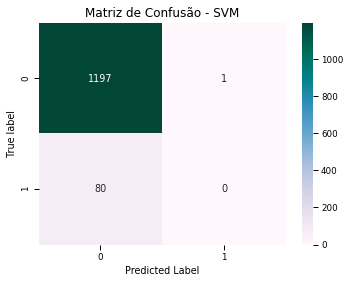

In [ ]:
# Visualização da matriz de confusão e parâmetros de performance
y_pred = plotagem_matriz_confusao ("SVM", svm, X_test, y_test, 
                                   folds, compara=False)

#### 5.3.3 Random Forest

In [ ]:
# Avaliação do modelo Random Forest usando o cross_val_score
rforest=RandomForestClassifier(n_estimators=60)
cross_val_score(rforest,X, y,cv=folds)

array([0.94618395, 0.93933464, 0.9481409 , 0.94911937, 0.94711068])

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1198
           1       0.19      0.04      0.06        80

    accuracy                           0.93      1278
   macro avg       0.56      0.51      0.51      1278
weighted avg       0.89      0.93      0.91      1278

Accuracy Score:  0.9295774647887324 




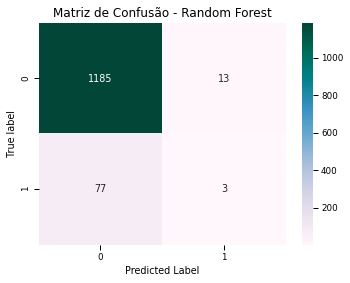

In [ ]:
# Visualização da matriz de confusão e métricas do modelo
y_pred = plotagem_matriz_confusao ("Random Forest", rforest, X_test, y_test, 
                                   folds, compara=False)

#### 5.3.4 K Neighbors

In [ ]:
# Avaliação do modelo KNeighbors usando o cross_val_score
kn = KNeighborsClassifier(n_neighbors=20, n_jobs=-1)
cross_val_score(kn, X, y,cv=folds)

array([0.95107632, 0.95107632, 0.95107632, 0.95107632, 0.95200784])

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278

Accuracy Score:  0.9374021909233177 




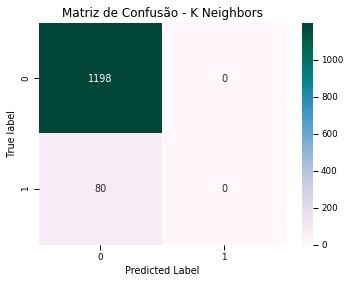

In [ ]:
# Visualização da matriz de confusão e métricas do modelo
y_pred = plotagem_matriz_confusao ("K Neighbors", kn, X_test, y_test, 
                                   folds, compara=False)

#### 5.3.5 Naive Bayes

In [ ]:
# Avaliação do modelo Naive Bayes usando o cross_val_score
nb = GaussianNB ()
cross_val_score(nb, X, y,cv=folds)

array([0.89726027, 0.87475538, 0.87181996, 0.90998043, 0.89715965])

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1198
           1       0.23      0.38      0.28        80

    accuracy                           0.88      1278
   macro avg       0.59      0.65      0.61      1278
weighted avg       0.91      0.88      0.89      1278

Accuracy Score:  0.8818466353677621 




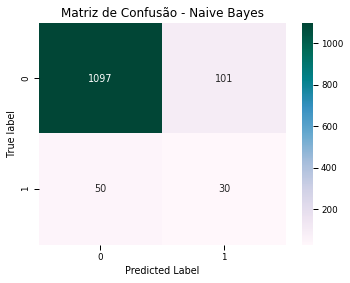

In [ ]:
# Visualização da matriz de confusão e métricas do modelo
y_pred = plotagem_matriz_confusao ("Naive Bayes", nb, X_test, y_test, 
                                   folds, compara=False)

#### 5.3.6 Comparação entre os Modelos


Evoluiu-se, assim, para a aplicação da técnica de validação cruzada (*cross validation*), onde os dados foram subdivididos em vários folds e foram separados os dados de teste e treino.

Inicialmente, os dados foram divididos em cinco folds e foi utilizada a função *cross_val_score*. Entretanto, percebeu-se que essa forma de divisão é muito direta (sequencial) e seria melhor misturar as informações, foi utilizando, assim, a função *KFold* com a opção *shuffle* configurada para true que randomiza a escolha dos dados.

Porém, uma forma melhor de subdividir esse conjunto é proporcionalizar os cinco folds, técnica conhecida como **StratifiedKFold** onde os folds preservam a proporção de amostras de cada classe gerando, assim, dados estratificados. Para o caso em questão onde temos um grande desbalanceamento da base de dados (95% pacientes não tiveram AVC X 5% pacientes que tiveram AVC), essa técnica mostra-se bastante adequada.

Observa-se que não houve uma mudança substancial em relação à acurácia dos modelos alcançada com a técnica anterior. Para os algoritmos Regressão Logística, Random Forest, SVM e K-Neighbors, a acurácia ficou em torno de 93% com uma especificidade de 0 ou quase 0 e com a sensibilidade de 1, porém conforme já foi comentado, **descobrir os pacientes propensos ao AVC tem uma relevância maior para o problema do que descobrir os não propensos**. O algoritmo NaiveBayes teve uma melhor performance geral, com uma acurácia de 0,88%, uma especificidade de 0,38 e uma sensibilidade de 0,92. Verificando a matriz de confusão, o algoritmo acertou 30 pacientes com predisposição ao AVC em relação aos 80. Mas ainda é um acerto de apenas 38%. 

Como ainda há um resultado de acurácia elevado, com predição incorreta dos propensos ao AVC, existe a possibilidade de overfitting. Devemos, assim, buscar por um resultado melhor aplicando novas técnicas e ajustes nos nossos modelos.


### 5.4 - Técnica Avaliação: **sobreamostragem e busca dos melhores hiperparâmetros**

Após as avaliações anteriores, percebe-se que existe uma dificuldade com essa base de dados, nossas classes são desequilibradas. Uma abordagem para lidar com conjuntos de dados desequilibrados é sobreamostrar a classe minoritária. A abordagem mais simples envolve a duplicação de exemplos na classe minoritária, embora esses exemplos não adicionem nenhuma informação nova ao modelo. Em vez disso, novos exemplos podem ser sintetizados a partir dos exemplos existentes. Este é um tipo de aumento de dados para a classe minoritária e é referido como **Synthetic Minority Oversampling Technique**, ou **SMOTE**, para abreviar.

Além disso, será utilizada uma função para a busca dos melhores hiperparâmetros a serem utilizados nos algoritmos.

In [ ]:
# Modelo utilizando o SMOTE (se parâmetro setado for True) ou 
# sem o SMOTE (se parâmetro setado for False)

def modelo_com_smote(X, y, classificador, param_grid, smote):
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.3,
                                                        stratify=y,
                                                        random_state=42)
    if smote == True:
        pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                       ['scaler', MinMaxScaler()],
                                       ['classifier', classificador]])
    else:
        smote = SMOTE(random_state = 42)
        X_train, y_train = smote.fit_resample(X_train, y_train)
        pipeline = Pipeline(steps = [['scaler', MinMaxScaler()],
                                     ['classifier', classificador]])
    folds = StratifiedKFold(n_splits=5,
                            shuffle=True,
                            random_state=42)
    score='f1'
    grid_search = GridSearchCV(estimator=pipeline,
                               refit=True,
                               param_grid=param_grid,
                               scoring=score,
                               cv=folds,
                               n_jobs=-1)
    grid_search.fit(X_train, y_train)
    #print(classificador.get_params().keys())
    #score='recall' 'roc_auc' 'accuracy' 'precision'
    #print ("best ", score, " train = ", grid_search.best_score_)
    #print ("best ", score, " test = ", grid_search.score(X_test, y_test))
    #print ("best parameters = ",  grid_search.best_params_, "\n")
    
    return (grid_search)   

####5.4.1 Regressão Logística

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1198
           1       0.16      0.74      0.26        80

    accuracy                           0.73      1278
   macro avg       0.57      0.74      0.55      1278
weighted avg       0.93      0.73      0.80      1278

Accuracy Score:  0.7331768388106417 




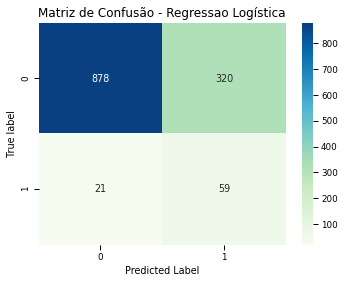

In [ ]:
# Regressão Logística

classificador = LogisticRegression(random_state=42)
param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
modelo = modelo_com_smote (X, y, classificador, param_grid, smote=True)
y_pred = plotagem_matriz_confusao ("Regressao Logística", modelo, X_test, y_test, 
                                   folds, compara=True)

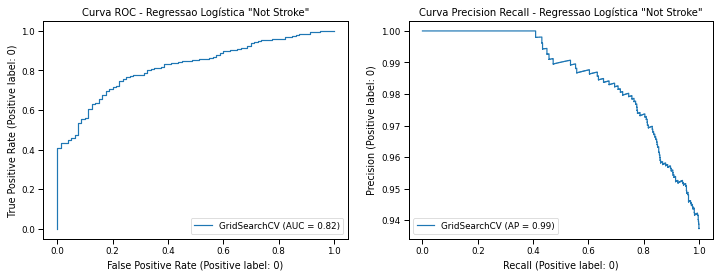

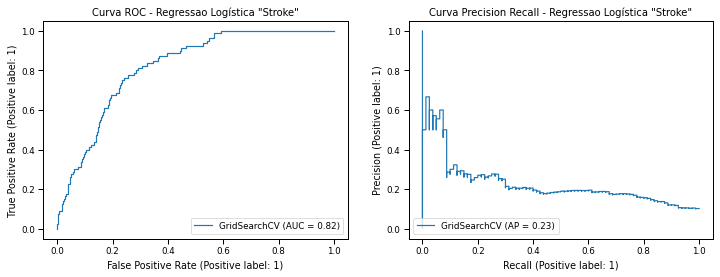

In [ ]:
# Visualização das Curvas ROC e Precision Recall de ambas as classes
roc_auc, ap = plotagem_curvas ("Regressao Logística", modelo, X_test, y_test, folds, 0)
roc_auc2, ap2 = plotagem_curvas ("Regressao Logística", modelo, X_test, y_test, folds, 1)
# Computa métricas do modelo
computa_metricas ("LogisticRegression", y_test, y_pred, roc_auc, roc_auc2, ap, ap2)

####5.4.2 Support Vector Machine (SVM)

              precision    recall  f1-score   support

           0       0.98      0.66      0.79      1198
           1       0.13      0.76      0.22        80

    accuracy                           0.67      1278
   macro avg       0.55      0.71      0.50      1278
weighted avg       0.92      0.67      0.75      1278

Accuracy Score:  0.6658841940532081 




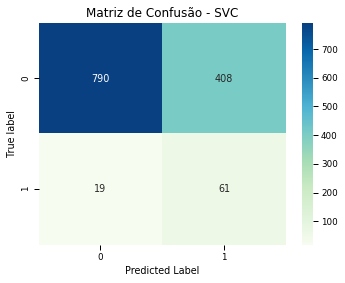

In [ ]:
# Support Vector Machine (SVM)

classificador = SVC (random_state=42)
param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
modelo = modelo_com_smote (X, y, classificador, param_grid, smote=True)
y_pred = plotagem_matriz_confusao ("SVC", modelo, X_test, y_test, folds, compara=True)

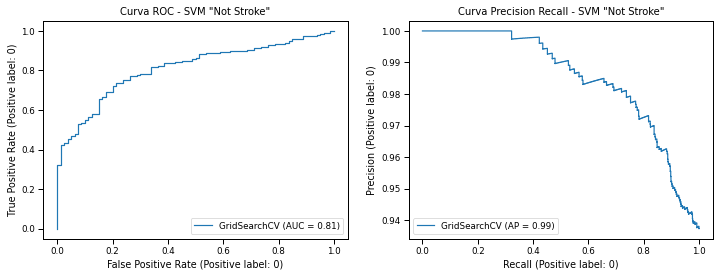

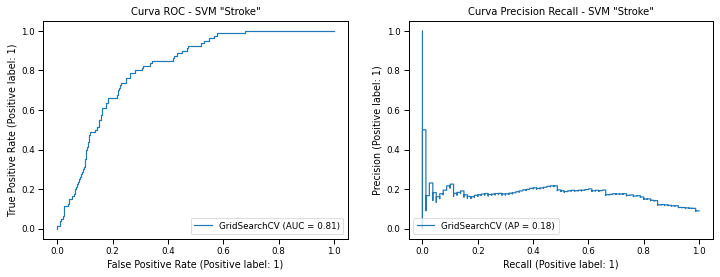

In [ ]:
# Visualização das Curvas ROC e Precision Recall de ambas as classes
roc_auc, ap = plotagem_curvas ("SVM", modelo, X_test, y_test, folds, 0)
roc_auc2, ap2 = plotagem_curvas ("SVM", modelo, X_test, y_test, folds, 1)
# Computa métricas do modelo
computa_metricas ("SVC", y_test, y_pred, roc_auc, roc_auc2, ap, ap2)

####5.4.3 Random Forest

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1198
           1       0.20      0.40      0.26        80

    accuracy                           0.86      1278
   macro avg       0.58      0.64      0.59      1278
weighted avg       0.91      0.86      0.88      1278

Accuracy Score:  0.8591549295774648 




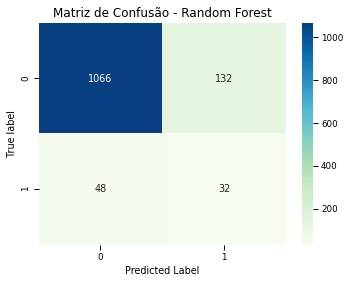

In [ ]:
# Random Forest

classificador = RandomForestClassifier(random_state=42)
param_grid = {'classifier__n_estimators':[64,100,128,200],
              'classifier__max_features':[2,3,5,7],
              'classifier__bootstrap':[True,False]}
modelo = modelo_com_smote (X, y, classificador, param_grid, smote=True)
y_pred = plotagem_matriz_confusao ("Random Forest", modelo, X_test, y_test,  
                                   folds, compara=True)

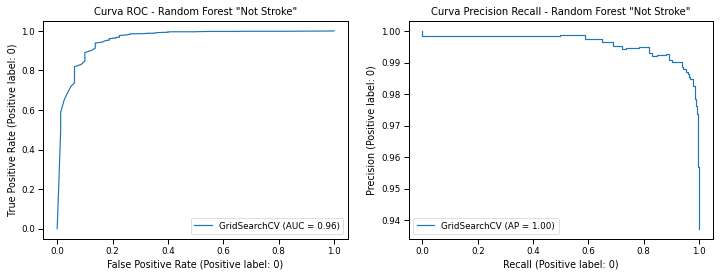

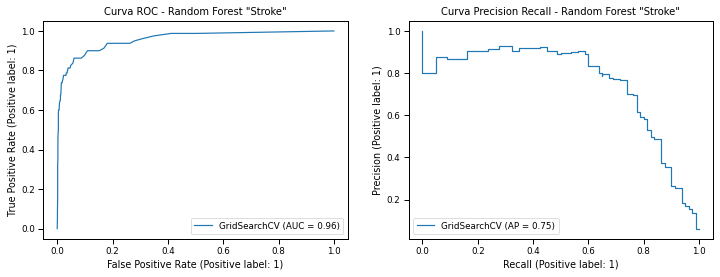

In [ ]:
# Visualização das Curvas ROC e Precision Recall de ambas as classes
roc_auc, ap = plotagem_curvas ("Random Forest", modelo, X_test, y_test, folds, 0)
roc_auc2, ap2 = plotagem_curvas ("Random Forest", modelo, X_test, y_test, folds, 1)
# Computa métricas do modelo
computa_metricas ("RandomForest", y_test, y_pred, roc_auc, roc_auc2, ap, ap2)

####5.4.4 K Neighbors

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1198
           1       0.14      0.50      0.22        80

    accuracy                           0.78      1278
   macro avg       0.55      0.65      0.55      1278
weighted avg       0.91      0.78      0.83      1278

Accuracy Score:  0.7832550860719875 




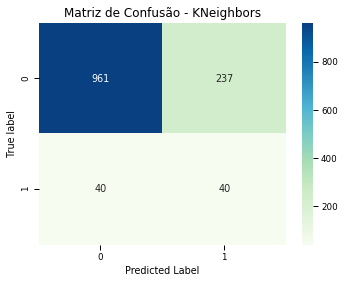

In [ ]:
# KNeighbors

classificador = KNeighborsClassifier()
param_grid = {'classifier__n_neighbors':[3,5,42,19],
              'classifier__weights':['uniform','distance'],
              'classifier__metric':['euclidean','manhattan']}
modelo = modelo_com_smote (X, y, classificador, param_grid, smote=True)
y_pred = plotagem_matriz_confusao ("KNeighbors", modelo, X_test, y_test, 
                                   folds, compara=True)

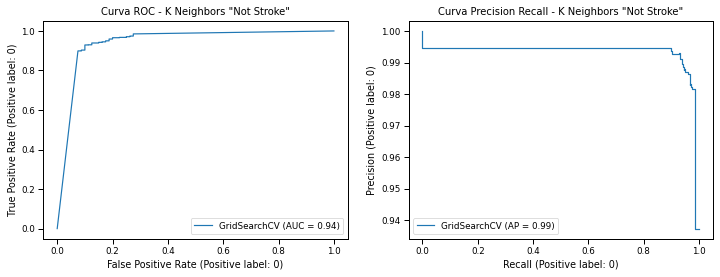

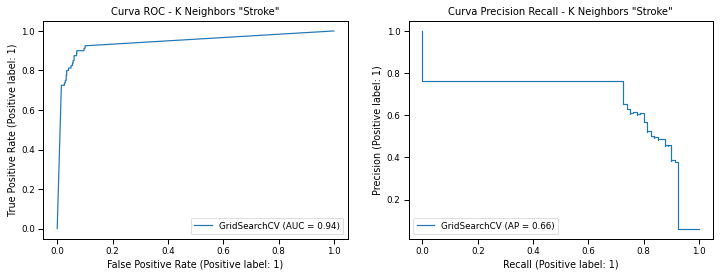

In [ ]:
# Visualização das Curvas ROC e Precision Recall de ambas as classes
roc_auc, ap = plotagem_curvas ("K Neighbors", modelo, X_test, y_test, folds, 0)
roc_auc2, ap2 = plotagem_curvas ("K Neighbors", modelo, X_test, y_test, folds, 1)
# Computa métricas do modelo
computa_metricas ("KNeighbors", y_test, y_pred, roc_auc, roc_auc2, ap, ap2)

####5.4.5 Naive Bayes

              precision    recall  f1-score   support

           0       0.97      0.68      0.80      1198
           1       0.13      0.74      0.23        80

    accuracy                           0.69      1278
   macro avg       0.55      0.71      0.52      1278
weighted avg       0.92      0.69      0.77      1278

Accuracy Score:  0.6862284820031299 




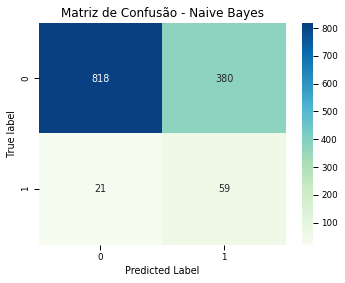

In [ ]:
# Naive Bayes

classificador = GaussianNB()
param_grid = {
    'classifier__priors': [None],
    'classifier__var_smoothing': np.logspace(0,-9, num=100)
}
modelo = modelo_com_smote (X, y, classificador, param_grid, smote=True)
y_pred = plotagem_matriz_confusao ("Naive Bayes", modelo, X_test, y_test, 
                                   folds, compara=True)

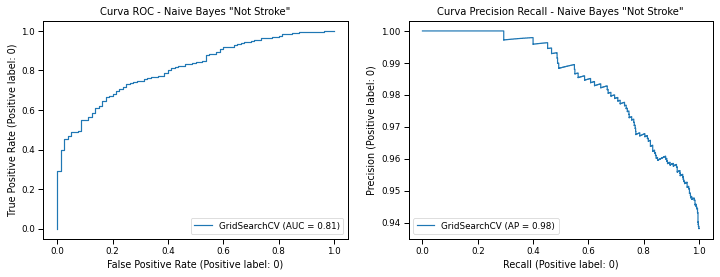

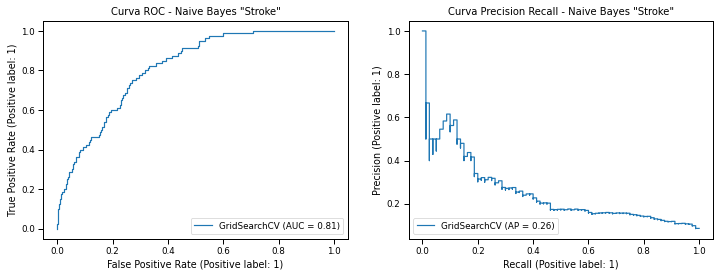

In [ ]:
# Visualização das Curvas ROC e Precision Recall de ambas as classes
roc_auc, ap = plotagem_curvas ("Naive Bayes", modelo, X_test, y_test, folds, 0)
roc_auc2, ap2 = plotagem_curvas ("Naive Bayes", modelo, X_test, y_test, folds, 1)
# Computa métricas do modelo
computa_metricas ("GaussianNB", y_test, y_pred, roc_auc, roc_auc2, ap, ap2)

####5.4.6 Comparação entre os Modelos

Foi utilizada a técnica de sobreamostragem (**SMOTE**) e a busca dos melhores hiperparâmetros com a função GridSearchCV. 
Para cada modelo selecionado, foram passados alguns hiperparâmetros para a função GridSearchCV que fez o ajuste (*tune*) identificando os melhores.

Segue abaixo para comparação as métricas de cada algoritmo analisado.

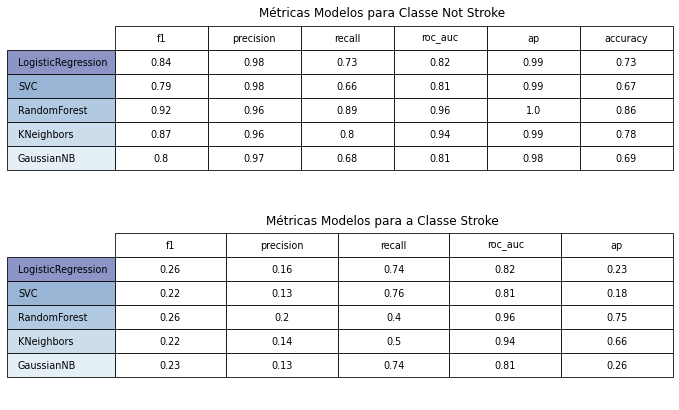

In [ ]:
# Comparação entre as métricas da Classe dos pacientes NÃO propensos ao AVC e 
# dos pacientes propensos ao AVC

plotagem_metricas (df_metricas_class0, df_metricas_class1, 
                 "Métricas Modelos para Classe Not Stroke", "Métricas Modelos para a Classe Stroke")

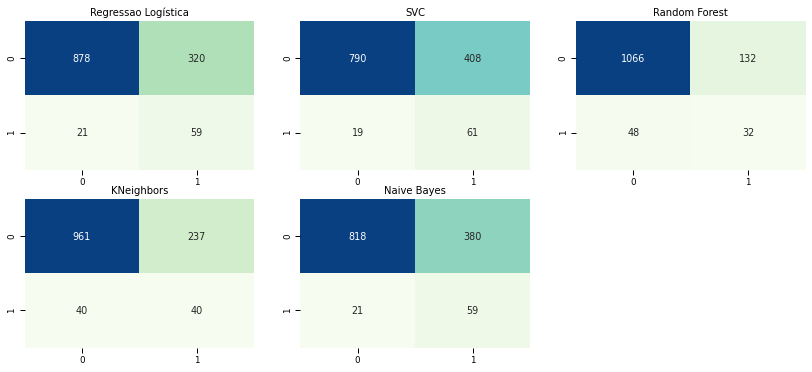

In [ ]:
# Plotagem das matrizes de confusão de todos os modelos analisados
plotagem_matrizes(cf_matrix)

A **acurácia** dos modelos ficou entre 67% e 86%. O modelo de melhor acurácia foi o *RandomForest* (86%). Porém a acurácia não é a única métrica a ser analisada, visto que é relevante para o problema ser acertivo na identificação do grupo de pacientes propensos ao AVC.

O **F1_Score** que é uma média harmônica entre precisão e recall teve um resultado entre 0,79 e 0,92 para a classe majoritária (Not Stroke), um resultado muito bom. Porém, para a classe minoritária (Stroke), o resultado ficou entre 0,22 e 0,26, que é um valor baixo.

A **Precisão** para a classe dos não propensos ao AVC é bem elevada, entre 0,96 e 0,98, mostrando que os acertos para esta previsão é muito bom em todos os algoritmos. E, para a classe minoritária é muita baixa, entre 0,13 e 0,20.

O **Recall** expressa a sensibilidade (na classe majoritária) e especificidade (na classe minoritária).  Observa-se que a melhor relação entre sensibilidade e especificidade foi a do algoritmo de Regressão Logística (0,73 e 0,74), seguido do Naive Bayes (0,68 e 0,74). O Random Forest teve uma sensibilidade elevada, mas uma especificidade mais baixa (0,89 e 0,4).

Sobre a **curva ROC**, os melhores resultados são dos algoritmos Random Forest (0,96) e K-Neighbors (0,94). Os outros três algoritmos possuem um AUC entre 0,81 e 0,82. Observa-se que o AUC é similar para a classe majoritária e minoritária, isso porque a sensibilidade/especificidade de ambas as classes são envolvidas no cálculo da área sob a curva.

Em se tratando da **curva Precision-Recall**, o valor do AP (Average Precision) para a classe majoritária é bom em todos os algoritmos, entre 0,98 e 1. Mas o da classe minoritária é substancialmente elevado no Random Forest (0,75), quando comparado aos demais algoritmos. 

A **matriz de confusão** reforça o resultado das métricas acima, mostrando que os algoritmos Regressão Logística, SVC e Naive Bayes tiveram um Verdadeiro Negativo entre 59 e 61. O Random Forest teve o melhor Verdadeiro Positivo 1066 de 1198, seguido do KNeighbors e da Regressão Logística.

**O desempenho geral do Random Forest é superior** a todos os algoritmos, entretanto pensando na importância da especificidade, **a recomendação é que o algoritmo de Regressão Logística deva ser utilizado, devido ao equilíbrio encontrado entre a sensibilidade e especificidade** e de possuir uma acurácia e demais métricas de boa aceitação.


## 6 - Conclusão

O objetivo do projeto é identificar padrões nos dados dos pacientes para efetuar uma predição dos que possuem predisposição para o AVC.

Foi efetuada uma análise exploratória dos dados dos pacientes, verificada as correlações entre os dados, identificada as variáveis independentes e a variável target. Após a fase inicial de exploração e análise gráfica, elencou-se alguns possíveis algoritmos para esse aprendizado de máquina supervisionado. 

Algumas técnicas foram aplicadas para avaliação dos algoritmos e, no final, a sobreamostragem junto com a busca dos melhores hiperparâmetros mostrou-se mais eficaz.

A grande questão é a resposta que se quer buscar para esse problema. É mais relevante identificar os pacientes não propensos ao AVC ou os que são propensos? Chegou-se a conclusão que é mais importante identificar as pessoas propensas ao AVC, já que elas poderão mudar seus hábitos alimentares e de vida para evitar que se concretize essa predição. Desse modo, as métricas com maior relevância para análise foram a sensibilidade e especificidade, em conjunto com a acurácia. A matriz de confusão e a curvas ROC e Precision-Recall também foram avaliadas. 

O Random Forest foi o algoritmo com um melhor desempenho em quase todas as métricas. Entretanto, devido à importância da especificidade no contexto da predição analisada, não foi o escolhido.

No conjunto geral, o **algoritmo de Regressão Logística mostrou-se mais adequado** pelo equilíbrio apresentado entre as métricas de sensibilidade, especificidade e acurácia. 

